<a href="https://colab.research.google.com/github/a-drew/banan.ai-mp1/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1. Imports and Globals

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import logging
from sklearn import *
from sklearn.utils._testing import ignore_warnings
from time import time

# controls max iterations of the MLP Classifier. Set higher for better results. Convergence warnings were silenced
max_iter = 4000
t = time()

#### 2. Load the df in Python (you can use pandas.read csv)

In [2]:
df = pd.read_csv('data/drug200.csv', dtype={'BP': 'category', 'Cholesterol': 'category', 'Drug': 'category'})
print(df.dtypes)

x = df.loc[:, ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']
classes = np.unique(y)

df

Age               int64
Sex              object
BP             category
Cholesterol    category
Na_to_K         float64
Drug           category
dtype: object


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


#### 3. Class Distribution
Plot the distribution of the instances in each class and store the graphic in a file called drug-distribution.pdf.
You can use matplotlib.pyplot. This pre-analysis will allow you to determine if the classes are balanced,
and which metric is more appropriate to use to evaluate the performance of your classifier.

{'drugA': 23, 'drugB': 16, 'drugC': 16, 'drugX': 54, 'drugY': 91}


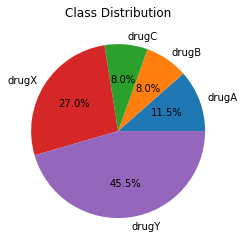

In [3]:
counts = {drug: np.count_nonzero(y == drug) for drug in classes}
print(counts)

plt.pie(counts.values(), labels=classes, autopct='%1.1f%%')
plt.title('Class Distribution')

plt.savefig('output/drug-distribution.pdf')
plt.show()

#### 4. Convert Features to Numerical Form
Convert all ordinal and nominal features in numerical format. Make sure that your converted format
respects the ordering of ordinal features, and does not introduce any ordering for nominal features.
You may want to take a look at pandas.get dummies and pandas.Categorical to do this.

In [4]:
x_numerical = pd.get_dummies(x, columns=['Sex'])
x_numerical['BP'] = x_numerical['BP'].cat.codes
x_numerical['Cholesterol'] = x_numerical['Cholesterol'].cat.codes
y_numerical = y.cat.codes

print(y_numerical)
x_numerical

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Length: 200, dtype: int8


,Age,BP,Cholesterol,Na_to_K,Sex_F,Sex_M
0,23,0,0,25.355,1,0
1,47,1,0,13.093,0,1
2,47,1,0,10.114,0,1
3,28,2,0,7.798,1,0
4,61,1,0,18.043,1,0
...,...,...,...,...,...,...
195,56,1,0,11.567,1,0
196,16,1,0,12.006,0,1
197,52,2,0,9.894,0,1
198,23,2,1,14.020,0,1


#### 5. Split the data into Training & Testing Sets
Split the dataset using train_test_split using the default parameter

In [5]:
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(x_numerical, y_numerical)
print(y_train)
x_train

40     4
128    4
154    4
146    3
10     2
      ..
144    0
194    4
42     4
2      2
48     4
Length: 150, dtype: int8


,Age,BP,Cholesterol,Na_to_K,Sex_F,Sex_M
40,73,2,0,19.221,1,0
128,47,1,1,33.542,0,1
154,37,1,1,16.724,0,1
146,37,1,1,12.006,1,0
10,47,1,0,11.767,1,0
...,...,...,...,...,...,...
144,39,0,0,9.664,0,1
194,46,0,0,34.686,1,0
42,50,2,1,15.790,0,1
2,47,1,0,10.114,0,1


#### 6. Run Different Classifiers:
    (a) NB: a Gaussian Naive Bayes Classifier (naive bayes.GaussianNB) with the default parameters.

In [6]:
models = []
print("\nPerforming Gaussian NB training...")
t0 = time()
gnb = skl.naive_bayes.GaussianNB()
models.append(gnb)
gnb.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))


Performing Gaussian NB training...
done in 0.003s


    (b) Base-DT: a Decision Tree (tree.DecisionTreeClassifier) with the default parameters.

In [7]:
print("Performing Base Decision Tree training...")
t0 = time()
bdt = skl.tree.DecisionTreeClassifier()
models.append(bdt)
bdt.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))

Performing Base Decision Tree training...
done in 0.003s


    (c) Top-DT: a better performing Decision Tree found using (GridSearchCV). The gridsearch will allow
    you to find the best combination of hyper-parameters, as determined by the evaluation function that
    you have determined in step (3) above. The hyper-parameters that you will experiment with are:
        - criterion: gini or entropy
        - max depth : 2 different values of your choice
        - min samples split: 3 different values of your choice

In [8]:
print("Performing Top-DT training w/ grid search...")
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5],
    'min_samples_split': [2, 5, 10]
}
print("parameters:", parameters)
t0 = time()
tdt = skl.model_selection.GridSearchCV(skl.tree.DecisionTreeClassifier(), parameters)
models.append(tdt)
tdt.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best score: %0.3f" % tdt.best_score_)
print("Best parameters:", tdt.best_params_)

Performing Top-DT training w/ grid search...
parameters: {'criterion': ['gini', 'entropy'], 'max_depth': [4, 5], 'min_samples_split': [2, 5, 10]}
done in 0.203s
Best score: 0.987
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}


    (d) PER: a Perceptron (linear model.Perceptron), with default parameter values.

In [9]:
print("Performing Perceptron training...")
t0 = time()
per = skl.linear_model.Perceptron()
models.append(per)
per.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()

Performing Perceptron training...
done in 0.005s



    (e) Base-MLP: a Multi-Layered Perceptron (neural network.MLPClassifier) with 1 hidden layer of
    100 neurons, sigmoid/logistic as activation function, stochastic gradient descent, and default values
    for the rest of the parameters.

In [10]:
print("Performing Base Multi-Layered Perceptron training...")
t0 = time()
bmlp = skl.neural_network.MLPClassifier(hidden_layer_sizes=100, activation='logistic', solver='sgd', max_iter=max_iter)
models.append(bmlp)
#with ignore_warnings(category=skl.exceptions.ConvergenceWarning):
bmlp.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))

Performing Base Multi-Layered Perceptron training...
done in 2.048s


    (f) Top-MLP: a better performing Multi-Layered Perceptron found using grid search. For this, you need
    to experiment with the following parameter values:
        - activation function: sigmoid, tanh, relu and identity
        - 2 network architectures of your choice: for eg 2 hidden layers with 30 + 50 nodes, 3 hidden layers with 10 + 10 + 10
        - solver: Adam and stochastic gradient descent

In [11]:
print("Performing Top-MLP training w/ grid search...")
parameters = {
    'hidden_layer_sizes': [(10, 20), (15, 15, 15)],
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'solver': ['sgd', 'adam'],
}
print("parameters:", parameters)
t0 = time()
tmlp = skl.model_selection.GridSearchCV(skl.neural_network.MLPClassifier(max_iter=max_iter), parameters)
models.append(tmlp)
#with ignore_warnings(category=skl.exceptions.ConvergenceWarning):
tmlp.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best score: %0.3f" % tmlp.best_score_)
print("Best parameters:", tmlp.best_params_)
print()

Performing Top-MLP training w/ grid search...
parameters: {'hidden_layer_sizes': [(10, 20), (15, 15, 15)], 'activation': ['logistic', 'tanh', 'relu', 'identity'], 'solver': ['sgd', 'adam']}
done in 56.587s
Best score: 0.953
Best parameters: {'activation': 'logistic', 'hidden_layer_sizes': (10, 20), 'solver': 'adam'}



#### 7. Report Best Hyperparameters and Metrics for each Classifier
For each of the 6 classifier above, append the following information in a file called drugs-performance.txt:

    (a) a clear separator (a sequence of hyphens or stars) and a string clearly describing the model (e.g. the
        model name + hyper-parameter values that you changed). In the case of Top-DT and Top-MLP,
        display the best hyperparameters found by the gridsearch.
    (b) the confusion matrix
    (c) the precision, recall, and F1-measure for each class
    (d) the accuracy, macro-average F1 and weighted-average F1 of the model

In [12]:
if os.path.exists('output/drug-performance.txt'):
    os.remove('output/drug-performance.txt')

logging.basicConfig(level=logging.INFO, format='%(message)s')
logger = logging.getLogger()
logger.addHandler(logging.FileHandler('output/drug-performance.txt', 'w'))
logger.info("Task 7:\n")

Task 7:



In [13]:
def performance_report(model):
    logger.info('================================================================================')
    if isinstance(model, skl.model_selection.GridSearchCV):
        logger.info("Top " + type(model.estimator).__name__)
        #logger.info("Best score: %0.3f" % model.best_score_)
        logger.info("Best parameters: ")
        logger.info(model.best_params_)
    else:
        logger.info(type(model).__name__)

    y_pred = model.predict(x_test)

    logger.info('\n(b) confusion_matrix:')
    logger.info(skl.metrics.confusion_matrix(y_test, y_pred))
    logger.info("\n(c/d) classification_report: ")
    logger.info(skl.metrics.classification_report(y_test, y_pred, target_names=classes))
    logger.info("\n(d) accuracy_score: ")
    logger.info(str(100 * skl.metrics.accuracy_score(y_test, y_pred)) + '%')
    logger.info("\n(d) f1_score (macro avg): ")
    logger.info(str(100 * skl.metrics.f1_score(y_test, y_pred, average='macro')) + '%')
    logger.info("\n(d) f1_score (weighted avg): ")
    logger.info(str(100 * skl.metrics.f1_score(y_test, y_pred, average='weighted')) + '%')
    logger.info('================================================================================')


for model in models:
    performance_report(model)

GaussianNB

(b) confusion_matrix:
[[ 4  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 16  2]
 [ 0  1  1  0 21]]

(c/d) classification_report: 
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       0.67      1.00      0.80         2
       drugC       0.75      1.00      0.86         3
       drugX       1.00      0.89      0.94        18
       drugY       0.91      0.91      0.91        23

    accuracy                           0.92        50
   macro avg       0.87      0.96      0.90        50
weighted avg       0.93      0.92      0.92        50


(d) accuracy_score: 
92.0%

(d) f1_score (macro avg): 
90.22725611983923%

(d) f1_score (weighted avg): 
92.22521008403362%
DecisionTreeClassifier

(b) confusion_matrix:
[[ 4  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 17  1]
 [ 0  0  0  0 23]]

(c/d) classification_report: 
              precision    recall  f1-score   support

       

#### 8. Calculate avg and std Metrics
Redo steps 6, 10 times for each model and append the average accuracy, average macro-average F1, average
weighted-average F1 as well as the standard deviation for the accuracy, the standard deviation of the macro-average F1,
and the standard deviation of the weighted-average F1 at the end of the file drugs-performance.txt.

In [14]:
logger.info("\nTask 8:\n")


def train_predict_collect_metrics(model):
    #with ignore_warnings(category=skl.exceptions.ConvergenceWarning):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = skl.metrics.accuracy_score(y_test, y_pred)
    maf1 = skl.metrics.f1_score(y_test, y_pred, average='macro')
    waf1 = skl.metrics.f1_score(y_test, y_pred, average='weighted')
    return acc, maf1, waf1


def general_metrics_report(metrics, desc=None):
    logger.info('================================================================================')
    if desc is not None:
        logger.info(desc)
    average = [sum(x) / len(x) for x in zip(*metrics)]
    logger.info("Average Accuracy: " + str(100 * average[0]) + "%")
    logger.info("Average macro-average F1: " + str(100 * average[1]) + "%")
    logger.info("Average weighted-average F1: " + str(100 * average[2]) + "%")
    std = [np.std(s) for s in zip(*metrics)]
    logger.info("Accuracy Standard Deviation: " + str(std[0]))
    logger.info("Macro-Average F1 Standard Deviation: " + str(std[1]))
    logger.info("Weighted-Average F1 Standard Deviation: " + str(std[2]))
    logger.info('================================================================================')


Task 8:



    (a) NB: a Gaussian Naive Bayes Classifier (naive bayes.GaussianNB) with the default parameters

In [15]:
print("\nCalculating Metrics for Gaussian NB...")
t0 = time()
gnb_metrics = []
for i in range(10):
    print('run #' + str(i + 1))
    gnb = skl.naive_bayes.GaussianNB()
    gnb_metrics.append(train_predict_collect_metrics(gnb))
    print(gnb_metrics[-1])
print("done in %0.3fs" % (time() - t0))
general_metrics_report(gnb_metrics, desc="Metrics for 10 runs of Gaussian Naive Bayes: ")


Calculating Metrics for Gaussian NB...
run #1
(0.92, 0.9022725611983923, 0.9222521008403362)
run #2
(0.92, 0.9022725611983923, 0.9222521008403362)
run #3
(0.92, 0.9022725611983923, 0.9222521008403362)
run #4
(0.92, 0.9022725611983923, 0.9222521008403362)
run #5
(0.92, 0.9022725611983923, 0.9222521008403362)
run #6
(0.92, 0.9022725611983923, 0.9222521008403362)

Metrics for 10 runs of Gaussian Naive Bayes: 
Average Accuracy: 92.00000000000001%
Average macro-average F1: 90.22725611983924%
Average weighted-average F1: 92.22521008403362%
Accuracy Standard Deviation: 1.1102230246251565e-16
Macro-Average F1 Standard Deviation: 0.0
Weighted-Average F1 Standard Deviation: 1.1102230246251565e-16



run #7
(0.92, 0.9022725611983923, 0.9222521008403362)
run #8
(0.92, 0.9022725611983923, 0.9222521008403362)
run #9
(0.92, 0.9022725611983923, 0.9222521008403362)
run #10
(0.92, 0.9022725611983923, 0.9222521008403362)
done in 0.077s


    (b) Base-DT: a Decision Tree (tree.DecisionTreeClassifier) with the default parameters

In [16]:
print("Calculating Metrics for Base Decision Tree...")
t0 = time()
bdt_metrics = []
for i in range(10):
    print('run #' + str(i + 1))
    bdt = skl.tree.DecisionTreeClassifier()
    bdt_metrics.append(train_predict_collect_metrics(bdt))
    print(bdt_metrics[-1])
print("done in %0.3fs" % (time() - t0))
general_metrics_report(bdt_metrics, desc="Metrics for 10 runs of Base Decision Tree: ")

Metrics for 10 runs of Base Decision Tree: 
Average Accuracy: 98.00000000000001%
Average macro-average F1: 99.00303951367782%
Average weighted-average F1: 97.99270516717324%
Accuracy Standard Deviation: 1.1102230246251565e-16
Macro-Average F1 Standard Deviation: 1.1102230246251565e-16
Weighted-Average F1 Standard Deviation: 1.1102230246251565e-16


Calculating Metrics for Base Decision Tree...
run #1
(0.98, 0.9900303951367782, 0.9799270516717326)
run #2
(0.98, 0.9900303951367782, 0.9799270516717326)
run #3
(0.98, 0.9900303951367782, 0.9799270516717326)
run #4
(0.98, 0.9900303951367782, 0.9799270516717326)
run #5
(0.98, 0.9900303951367782, 0.9799270516717326)
run #6
(0.98, 0.9900303951367782, 0.9799270516717326)
run #7
(0.98, 0.9900303951367782, 0.9799270516717326)
run #8
(0.98, 0.9900303951367782, 0.9799270516717326)
run #9
(0.98, 0.9900303951367782, 0.9799270516717326)
run #10
(0.98, 0.9900303951367782, 0.9799270516717326)
done in 0.067s


    (c) Top-DT: a better performing Decision Tree found using (GridSearchCV)

In [17]:
print("Calculating Metrics for Top-DT w/ grid search...")
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5],
    'min_samples_split': [2, 5, 10]
}
t0 = time()
tdt_metrics = []
for i in range(10):
    print('run #' + str(i + 1))
    tdt = skl.model_selection.GridSearchCV(skl.tree.DecisionTreeClassifier(), parameters)
    tdt_metrics.append(train_predict_collect_metrics(tdt))
    print(tdt_metrics[-1])
print("done in %0.3fs" % (time() - t0))
general_metrics_report(tdt_metrics, desc="Metrics for 10 runs of Top Decision Tree: ")

Calculating Metrics for Top-DT w/ grid search...
run #1
(0.98, 0.9900303951367782, 0.9799270516717326)
run #2
(0.98, 0.9900303951367782, 0.9799270516717326)
run #3
(0.98, 0.9900303951367782, 0.9799270516717326)
run #4
(0.98, 0.9900303951367782, 0.9799270516717326)
run #5
(0.98, 0.9900303951367782, 0.9799270516717326)
run #6
(0.98, 0.9900303951367782, 0.9799270516717326)
run #7
(0.98, 0.9900303951367782, 0.9799270516717326)
run #8
(0.98, 0.9900303951367782, 0.9799270516717326)
run #9
(0.98, 0.9900303951367782, 0.9799270516717326)
run #10


Metrics for 10 runs of Top Decision Tree: 
Average Accuracy: 98.00000000000001%
Average macro-average F1: 99.00303951367782%
Average weighted-average F1: 97.99270516717324%
Accuracy Standard Deviation: 1.1102230246251565e-16
Macro-Average F1 Standard Deviation: 1.1102230246251565e-16
Weighted-Average F1 Standard Deviation: 1.1102230246251565e-16


(0.98, 0.9900303951367782, 0.9799270516717326)
done in 2.532s


    (d) PER: a Perceptron (linear model.Perceptron), with default parameter values

In [18]:
print("Calculating Metrics for Perceptron...")
t0 = time()
per_metrics = []
for i in range(10):
    print('run #' + str(i + 1))
    per = skl.linear_model.Perceptron()
    per_metrics.append(train_predict_collect_metrics(per))
    print(per_metrics[-1])
print("done in %0.3fs" % (time() - t0))
general_metrics_report(per_metrics, desc="Metrics for 10 runs of Perceptron: ")

Metrics for 10 runs of Perceptron: 
Average Accuracy: 59.999999999999986%
Average macro-average F1: 26.424242424242422%
Average weighted-average F1: 54.23030303030302%
Accuracy Standard Deviation: 1.1102230246251565e-16
Macro-Average F1 Standard Deviation: 0.0
Weighted-Average F1 Standard Deviation: 1.1102230246251565e-16


Calculating Metrics for Perceptron...
run #1
(0.6, 0.2642424242424243, 0.5423030303030303)
run #2
(0.6, 0.2642424242424243, 0.5423030303030303)
run #3
(0.6, 0.2642424242424243, 0.5423030303030303)
run #4
(0.6, 0.2642424242424243, 0.5423030303030303)
run #5
(0.6, 0.2642424242424243, 0.5423030303030303)
run #6
(0.6, 0.2642424242424243, 0.5423030303030303)
run #7
(0.6, 0.2642424242424243, 0.5423030303030303)
run #8
(0.6, 0.2642424242424243, 0.5423030303030303)
run #9
(0.6, 0.2642424242424243, 0.5423030303030303)
run #10
(0.6, 0.2642424242424243, 0.5423030303030303)
done in 0.083s


    (e) Base-MLP: a Multi-Layered Perceptron (neural network.MLPClassifier)

In [19]:
print("Calculating Metrics for Base Multi-Layered Perceptron...")
t0 = time()
bmlp_metrics = []
for i in range(10):
    print('run #' + str(i + 1))
    bmlp = skl.neural_network.MLPClassifier(hidden_layer_sizes=100, activation='logistic', solver='sgd', max_iter=max_iter)
    bmlp_metrics.append(train_predict_collect_metrics(bmlp))
    print(bmlp_metrics[-1])
print("done in %0.3fs" % (time() - t0))
print()
general_metrics_report(bmlp_metrics, desc="Metrics for 10 runs of Base Multi-Layered Perceptron: ")

Calculating Metrics for Base Multi-Layered Perceptron...
run #1
(0.78, 0.4195918367346939, 0.7330612244897959)
run #2
(0.76, 0.33568939771030365, 0.6940368342458935)
run #3
(0.76, 0.33568939771030365, 0.6940368342458935)
run #4
(0.8, 0.4291869918699187, 0.7522032520325204)
run #5
(0.78, 0.4280128893662729, 0.7482191192266382)
run #6
(0.76, 0.33568939771030365, 0.6940368342458935)
run #7
(0.78, 0.4195918367346939, 0.7330612244897959)
run #8
(0.78, 0.4195918367346939, 0.7330612244897959)
run #9
(0.76, 0.33568939771030365, 0.6940368342458935)
run #10


Metrics for 10 runs of Base Multi-Layered Perceptron: 
Average Accuracy: 77.8%
Average macro-average F1: 39.451540167045984%
Average weighted-average F1: 72.58261598283647%
Accuracy Standard Deviation: 0.0188679622641132
Macro-Average F1 Standard Deviation: 0.05147749404820411
Weighted-Average F1 Standard Deviation: 0.02934166755028262


(0.82, 0.48642103442311024, 0.7825082165715274)
done in 21.064s



    (f) Top-MLP: a better performing Multi-Layered Perceptron found using grid search

In [20]:
print("Calculating Metrics for Top Multi-Layered Perceptron...")
parameters = {
    'hidden_layer_sizes': [(10, 20), (15, 15, 15)],
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'solver': ['sgd', 'adam'],
    'max_iter': [max_iter],
}
t0 = time()
tmlp_metrics = []
for i in range(10):
    print('run #' + str(i + 1))
    tmlp = skl.model_selection.GridSearchCV(skl.neural_network.MLPClassifier(), parameters)
    tmlp_metrics.append(train_predict_collect_metrics(tmlp))
    print(tmlp_metrics[-1])
print("done in %0.3fs" % (time() - t0))
print()
general_metrics_report(tmlp_metrics, desc="Metrics for 10 runs of Top Multi-Layered Perceptron: ")

print("\n\nTotal runtime: %0.3fs" % (time() - t))

Calculating Metrics for Top Multi-Layered Perceptron...
run #1
(0.94, 0.8573809523809525, 0.9391190476190476)
run #2
(0.9, 0.8136507936507936, 0.9007619047619048)
run #3
(0.5, 0.2023809523809524, 0.4464285714285715)
run #4
(0.98, 0.9555555555555555, 0.9817777777777777)
run #5
(0.94, 0.8573809523809525, 0.9391190476190476)
run #6
(0.94, 0.9142857142857143, 0.9457142857142855)
run #7
(0.94, 0.8573809523809525, 0.9391190476190476)
run #8
(0.94, 0.8090780141843972, 0.9395460992907801)
run #9
(0.92, 0.7992857142857143, 0.9198809523809524)
run #10


Metrics for 10 runs of Top Multi-Layered Perceptron: 
Average Accuracy: 89.59999999999997%
Average macro-average F1: 79.85665315771699%
Average weighted-average F1: 89.08681019925702%
Accuracy Standard Deviation: 0.13350655414622908
Macro-Average F1 Standard Deviation: 0.20463694694455767
Weighted-Average F1 Standard Deviation: 0.1494973668483831


(0.96, 0.9192857142857143, 0.9572142857142856)
done in 454.159s



Total runtime: 537.287s


#### 8. Analysis
Does the same model give you the same performance every time? Explain in a plain text file called drugs-discussion.txt.
1 or 2 paragraph discussion is expected.